In [ ]:
<font color="blue">

# 데이터다루기~

## csv, 웹(html), XML, JSON

## 1.CSV
- CSV, 필드를 쉼표(,)로 구분한 텍스트 파일
- <font color="blue">엑셀 양식의 데이터를 프로그램에 상관없이 쓰기 위한 데이터 형식이라고 생각하면 쉬움</font>
- 탭(TSV), 빈칸(SSV) 등으로 구분해서 만들기도 함
- 통칭하여 character-separated values (CSV) 부름
- 엑셀에서는 “다름 이름 저장” 기능으로 사용 가능

### 1-1. csv파일 읽기

In [5]:
line_counter = 0
data_header = []
customer_list = []

with open('dataset/customers.csv') as customer_data: # customers.csv 파일을 customer_data 객체에 저장
    while True:
        data = customer_data.readline() # customer.csv파일을 한 줄씩 data변수에 저장
        if not data: break
        if line_counter==0: # 첫번째 데이터 필드
            data_header = data.split(',') # 헤더에 저장. 저장시 ,로 분리
        else:
            customer_list.append(data.split(',')) # 나머지 데이터는 customer_list에 저장
        line_counter += 1
        
print("Header :\t", data_header) #데이터 필드 값 출력
for i in range(0,10): #데이터 출력 (샘플 10개만)
    print ("Data",i,":\t\t",customer_list[i])
print (len(customer_list)) #전체 데이터 크기 출력

Header :	 ['customerNumber', 'customerName', 'contactLastName', 'contactFirstName', 'phone', 'addressLine1', 'addressLine2', 'city', 'state', 'postalCode', 'country', 'salesRepEmployeeNumber', 'creditLimit\n']
Data 0 :		 ['103', '"Atelier graphique"', 'Schmitt', '"Carine "', '40.32.2555', '"54', ' rue Royale"', 'NULL', 'Nantes', 'NULL', '44000', 'France', '1370', '21000\n']
Data 1 :		 ['112', '"Signal Gift Stores"', 'King', 'Jean', '7025551838', '"8489 Strong St."', 'NULL', '"Las Vegas"', 'NV', '83030', 'USA', '1166', '71800\n']
Data 2 :		 ['114', '"Australian Collectors', ' Co."', 'Ferguson', 'Peter', '"03 9520 4555"', '"636 St Kilda Road"', '"Level 3"', 'Melbourne', 'Victoria', '3004', 'Australia', '1611', '117300\n']
Data 3 :		 ['119', '"La Rochelle Gifts"', 'Labrune', '"Janine "', '40.67.8555', '"67', ' rue des Cinquante Otages"', 'NULL', 'Nantes', 'NULL', '44000', 'France', '1370', '118200\n']
Data 4 :		 ['121', '"Baane Mini Imports"', 'Bergulfsen', '"Jonas "', '"07-98 9555"', '"E

### 1-2.csv파일 쓰기

In [ ]:
line_counter = 0
data_header = []
employee = []
customer_USA_only_list = []
customer = None

with open ("customers.csv", "r") as customer_data:
    while 1:
        data = customer_data.readline()
        if not data:
            break
        if line_counter==0:
            data_header = data.split(",")
        else:
            customer = data.split(",")
            if customer[10].upper() == "USA": #customer 데이터의 offset 10번째 값
                customer_USA_only_list.append(customer) #즉 country 필드가 “USA” 것만
        line_counter+=1 #sutomer_USA_only_list에 저장
print ("Header :\t", data_header)
for i in range(0,10):
    print ("Data :\t\t",customer_USA_only_list[i])
print (len(customer_USA_only_list))

with open ("customers_USA_only.csv", "w") as customer_USA_only_csv:
    for customer in customer_USA_only_list:
        customer_USA_only_csv.write(",".join(customer).strip('\n')+"\n")
        #cutomer_USA_only_list 객체에 있는 데이터를 customers_USA_only.csv 파일에 쓰기


### 1-3. 한글깨짐 방지 예제

In [ ]:
import csv
seoung_nam_data = []
header = []
rownum = 0

with open("korea_floating_population_data.csv","r", encoding="cp949") as p_file:
    csv_data = csv.reader(p_file) #csv 객체를 이용해서 csv_data 읽기
    for row in csv_data: #읽어온 데이터를 한 줄씩 처리
        if rownum == 0:
            header = row #첫 번째 줄은 데이터 필드로 따로 저장
        location = row[7]
        #“행정구역”필드 데이터 추출, 한글 처리로 유니코드 데이터를 cp949로 변환
        if location.find(u"성남시") != -1:
            seoung_nam_data.append(row)
        #”행정구역” 데이터에 성남시가 들어가 있으면 seoung_nam_data List에 추가
    rownum +=1
    
with open("seoung_nam_floating_population_data.csv","w", encoding="utf8") as s_p_file:
    writer = csv.writer(s_p_file, delimiter='\t', quotechar="'", quoting=csv.QUOTE_ALL)
    # csv.writer를 사용해서 csv 파일 만들기 delimiter 필드 구분자
    # quotechar는 필드 각 데이터는 묶는 문자, quoting는 묶는 범위
    writer.writerow(header) #제목 필드 파일에 쓰기
    for row in seoung_nam_data:
    writer.writerow(row) #seoung_nam_data에 있는 정보 list에 쓰

## 2. Web
- World Wide Web(WWW), 줄여서 웹이라고 부름
- 우리가 늘 쓰는 인터넷 공간의 정식 명칭
- 팀 버너스리에 의해 1989년 처음 제안되었으며, 원래는 물리학자들간 정보 교환을 위해 사용됨
- 데이터 송수신을 위한 HTTP 프로토콜 사용, 데이터를 표시하기 위해 HTML 형식을 사용

### 2-1.HTML(Hyper Text Markup Language)
- 웹 상의 정보를 구조적으로 표현하기 위한 언어
- 제목, 단락, 링크 등 요소 표시를 위해 Tag를 사용
- 모든 요소들은 꺾쇠 괄호 안에 둘러 쌓여 있음 
- 모든 HTML은 트리 모양의 포함관계를 가짐
- 일반적으로 웹 페이지의 HTML 소스파일은 컴퓨터가 다운로드 받은 후 웹 브라우저가 해석/표시


### 2-2 왜 웹을 알아야하나?
- 정보의 보고, 많은 데이터들이 웹을 통해 공유됨

환율정보: https://finance.naver.com/

날씨정보 : http://goo.gl/nwi8WE

미국 특허정보: http://bit.ly/3pxFkjb

- HTML도 일종의 프로그램, 페이지 생성 규칙이 있음
    - : 규칙을 분석하여 데이터의 추출이 가능
- 추출된 데이터를 바탕으로 하여 다양한 분석이 가능


### 2-3. 정규식(regular expression)
    - 정규 표현식, regexp 또는 regex 등으로 불림
    - 복잡한 문자열 패턴을 정의하는 문자 표현 공식
    - 특정한 규칙을 가진 문자열의 집합을 추출

010-0000-0000 ^\d{3}\-\d{4}\-\d{4}$

203.252.101.40 ^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}$


    - 정규식예제

In [8]:
import re
import urllib.request
url = "https://bit.ly/3rxQFS4"
html = urllib.request.urlopen(url)
html_contents = str(html.read())
id_results = re.findall(r"([A-Za-z0-9]+\*\*\*)", html_contents)
#findall 전체 찾기, 패턴대로 데이터 찾기
for result in id_results:
    print (result)

codo***
outb7***
dubba4***
multicuspi***
crownm***
triformo***
spania***
magazin***
presby***
trophody***
nontr***
enranck***
canc***
uncanker***
wrymo***
non***
luminat***
oblig***
anna***
hyperth***
toplabl***
dolce0***
rudals2***
jjw980***
elvlz***
skmid***
qkep***
kisslov***
maskman***
sungt***


In [9]:
import urllib.request # urllib 모듈 호출
import re
url = "http://www.google.com/googlebooks/uspto-patents-grants-text.html" 
#url 값 입력
html = urllib.request.urlopen(url) # url 열기
html_contents = str(html.read().decode("utf8")) 
# html 파일 읽고, 문자열로 변환
url_list = re.findall(r"(http)(.+)(zip)", html_contents)
for url in url_list:
    print("".join(url)) # 출력된 Tuple 형태 데이터 str으로 join


http://storage.googleapis.com/patents/grant_full_text/2015/ipg150106.zip
http://storage.googleapis.com/patents/grant_full_text/2015/ipg150113.zip
http://storage.googleapis.com/patents/grant_full_text/2015/ipg150120.zip
http://storage.googleapis.com/patents/grant_full_text/2015/ipg150127.zip
http://storage.googleapis.com/patents/grant_full_text/2015/ipg150203.zip
http://storage.googleapis.com/patents/grant_full_text/2015/ipg150210.zip
http://storage.googleapis.com/patents/grant_full_text/2015/ipg150217.zip
http://storage.googleapis.com/patents/grant_full_text/2015/ipg150224.zip
http://storage.googleapis.com/patents/grant_full_text/2015/ipg150303.zip
http://storage.googleapis.com/patents/grant_full_text/2015/ipg150310.zip
http://storage.googleapis.com/patents/grant_full_text/2015/ipg150317.zip
http://storage.googleapis.com/patents/grant_full_text/2014/ipg140107.zip
http://storage.googleapis.com/patents/grant_full_text/2014/ipg140114.zip
http://storage.googleapis.com/patents/grant_full_te

In [19]:
import urllib.request
import re
url = "http://finance.naver.com/item/main.nhn?code=005930"
html = urllib.request.urlopen(url)
html_contents = str(html.read().decode("ms949"))
stock_results = re.findall("(\<dl class=\"blind\"\>)([\s\S]+?)(\<\/dl\>)", html_contents)

samsung_stock = stock_results[0] # 두 개 tuple 값중 첫번째 패턴
samsung_index = samsung_stock[1] # 세 개의 tuple 값중 두 번째 값

# 하나의 괄호가 tuple index가 됨
index_list= re.findall("(\<dd\>)([\s\S]+?)(\<\/dd\>)", samsung_index)
index_list

for index in index_list:
    print (index[1]) # 세 개의 tuple 값중 두 번째 값

2022년 07월 22일 16시 11분 기준 장마감
종목명 삼성전자
종목코드 005930 코스피
현재가 61,300 전일대비 하락 500 마이너스 0.81 퍼센트
전일가 61,800
시가 61,800
고가 62,200
상한가 80,300
저가 61,200
하한가 43,300
거래량 10,235,096
거래대금 630,265백만


## 3. XML
- 데이터의 구조와 의미를 설명하는 TAG(MarkUp)를 사용하여 표시하는 언어
- TAG와 TAG사이에 값이 표시되고, 구조적인 정보를 표현할 수 있음
- HTML과 문법이 비슷, 대표적인 데이터 저장 방식

- 정보의 구조에 대한 정보인 스키마와 DTD 등으로 정보에 대한 정보(메타정보)가 표현되며, 용도에 따라 다양한 형태로 변경가능
- XML은 컴퓨터(예: PC ↔ 스마트폰)간에 정보를 주고받기 <font color="blue">매우 유용한 저장 방식</font>으로 쓰이고 있음

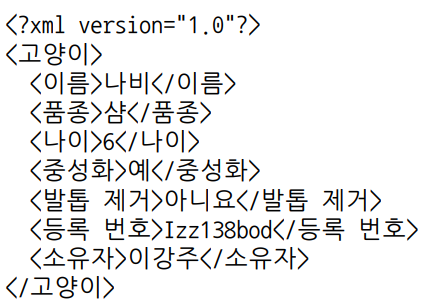

### 3-1. XML Parsing in Python
- XML도 HTML과 같이 구조적 markup 언어
- 정규표현식으로 Parsing이 가능함
- 그러나 좀 더 손쉬운 도구들이 개발되어 있음
- 가장 많이 쓰이는 parser인 beautifulsoup으로 파싱
    - HTML, XML등 Markup 언어 Scraping을 위한 대표적인 도구
    - lxml 과 html5lib 과 같은 Parser를 사용함
    - 속도는 상대적으로 느리나 간편히 사용할 수 있음

#### lxml이 제일 빠름

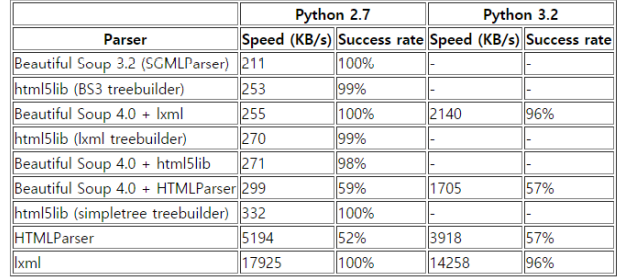

In [20]:
from bs4 import BeautifulSoup

- 모듈 호출

from bs4 import BeautifulSoup

- 객체 생성

soup = BeautifulSoup(books_xml,"lxml")

- Tag 찾는 함수 find_all 생성

soup.find_all("author")

### 3-2. beautifulsoup 예제

In [ ]:
from bs4 import BeautifulSoup
with open("books.xml", "r", encoding="utf8") as books_file:
    books_xml = books_file.read() # File을 String으로 읽어오기
    
soup = BeautifulSoup(books_xml, "lxml") # lxml Parser를 사용해서 데이터 분석

# author가 들어간 모든 element 추출
for book_info in soup.find_all("author"):
    print (book_info)
    print (book_info.get_text()

In [21]:
import urllib.request
from bs4 import BeautifulSoup
with open("dataset/US08621662-20140107.XML", "r", encoding="utf8") as patent_xml:
    xml = patent_xml.read() # File을 String으로 읽어오기
soup = BeautifulSoup(xml, "lxml") #lxml parser 호출

#invention-title tag 찾기
invention_title_tag = soup.find("invention-title")
print (invention_title_tag.get_text())

Adjustable shoulder device for hard upper torso suit


- 태그가 2개로 쌓여있으면 2번해야함

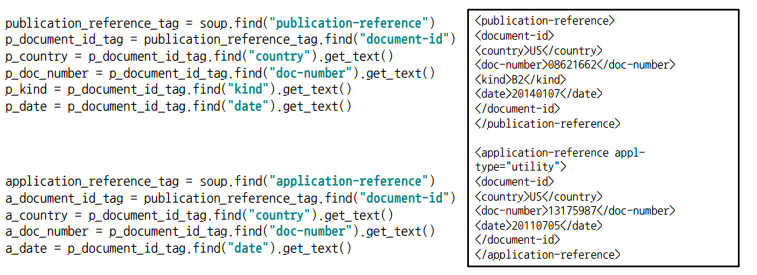

## 4. JSON
- JavaScript Object Notation
- 원래 웹 언어인 Java Script의 데이터 객체 표현 방식
- <font color="blue">간결성</font>으로 기계/인간이 모두 이해하기 편함
- 데이터 용량이 적고, Code로의 전환이 쉬움
- 이로 인해 XML의 대체제로 많이 활용되고 있음


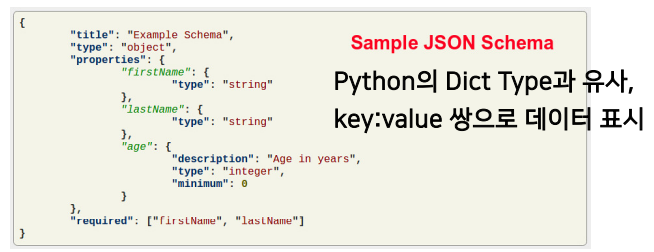

- json 모듈을 사용하여 손 쉽게 파싱 및 저장 가능
- 데이터 저장 및 읽기는 dict type과 상호 호환 가능
- 웹에서 제공하는 API는 대부분 정보 교환 시 JSON 활용
- 페이스북, 트위터, Github 등 거의 모든 사이트
- 각 사이트 마다 <font color="blue">Developer API의 활용법을 찾아 사용</font>


### 4-1. JSON Read
- json.loads()

In [32]:
import json
with open("dataset/json_example.json", "r", encoding="utf8") as f:
    contents = f.read()
    json_data = json.loads(contents)
    print(type(json_data))
    print(json_data)
for employee in json_data['employees']:
    print(employee)

<class 'dict'>
{'employees': [{'firstName': 'John', 'lastName': 'Doe'}, {'firstName': 'Anna', 'lastName': 'Smith'}, {'firstName': 'Peter', 'lastName': 'Jones'}]}
{'firstName': 'John', 'lastName': 'Doe'}
{'firstName': 'Anna', 'lastName': 'Smith'}
{'firstName': 'Peter', 'lastName': 'Jones'}


### 4-2. JSON Write
- json.dump()

In [33]:
import json
dict_data = {'Name'  : 'Zara'
            ,'Age'   : 7
            ,'Class' : 'First'
            }
with open("dataset/data.json","w") as f:
    json.dump(dict_data, f)

### 4-3. Twitter 데이터 가져오기